In [ ]:
#Aluno: Paulo Francisco da Silva Junior

In [ ]:
import numpy as np
from scipy.integrate import odeint
import scipy.optimize as sc
import matplotlib.pyplot as plt
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd

Questão 1.

Considere o seguinte problema e seu valor inicial $ y^{'} = t^{2} + cos(y) $, $ y(0) = 0 $. Plote a solução para $ 0 \leq t \leq 1 $, e encontre o valor aproximado de $ y(1) $.

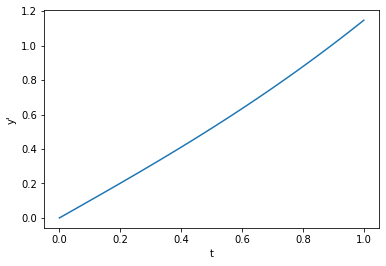

In [ ]:
def modelo(y,t):
    #dy/dt=t**2+np.cos(y)
    dydt = t**2+np.cos(y)
    return dydt
y0 = 0
t = np.linspace(0,1)
y = odeint(modelo, y0, t)

plt.plot(t,y);
plt.xlabel("t")
plt.ylabel("y'")
plt.show()

In [ ]:
modelo(y,1)

array([[2.        ],
       [1.99979173],
       [1.99916667],
       [1.99812403],
       [1.99666252],
       [1.99478033],
       [1.99247515],
       [1.98974418],
       [1.98658412],
       [1.98299121],
       [1.97896123],
       [1.97448952],
       [1.96957098],
       [1.96420013],
       [1.95837111],
       [1.95207769],
       [1.94531332],
       [1.93807115],
       [1.93034405],
       [1.92212465],
       [1.91340539],
       [1.90417853],
       [1.89443617],
       [1.88417035],
       [1.87337303],
       [1.86203616],
       [1.85015173],
       [1.83771176],
       [1.82470841],
       [1.81113401],
       [1.79698108],
       [1.78224237],
       [1.76691098],
       [1.7509803 ],
       [1.73444415],
       [1.7172968 ],
       [1.69953297],
       [1.68114797],
       [1.66213765],
       [1.64249855],
       [1.62222784],
       [1.60132346],
       [1.5797841 ],
       [1.55760927],
       [1.53479938],
       [1.51135571],
       [1.48728055],
       [1.462

Questão 2.

Resolva o seguinte sistema linear:

\begin{eqnarray}
x + 4y = 34 \\
-3x +y = 2
\end{eqnarray}

In [ ]:
#Sistema de equações
sistema=np.matrix([[1,4],[-3,1]])

#Igualdade
equal=np.matrix([[34],[2]])
resultado = np.linalg.solve(sistema,equal)
print("O resultado para o sistema de equação é: "+str(resultado))

O resultado para o sistema de equação é: [[2.]
 [8.]]


Questão 3.

Ache o mínimo da função $ f(x) = cos(4x) * sen(10x) * e^{-|x|} $ no domínio que vai
de $-\pi$ a $\pi$. Use o comando *fminbound*. Em seguida faça o gráfico da função sobre o domínio
dado para verificar se realmente o valor encontrado corresponde a o mínimo. OBS.: o comando *np.abs(x)* fornece o valor absoluto do número x e *np.pi* o número $\pi$. *np.cos()* e *np.sin()* calcula o cosseno e o seno se um valor, respectivamente.

 
 Func-count     x          f(x)          Procedure
    1      -0.741629      0.42484        initial
    2       0.741629     -0.42484        golden
    3        1.65833    -0.137356        golden
    4       0.775457    -0.457857        parabolic
    5        1.09264     0.112139        parabolic
    6       0.896609    -0.163049        golden
    7       0.780727    -0.457493        parabolic
    8         0.7768    -0.457905        parabolic
    9       0.776796    -0.457905        parabolic
   10       0.776793    -0.457905        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
Ponto minimo:(0.7767962505527384, -0.4579054636878386, 0, 10)


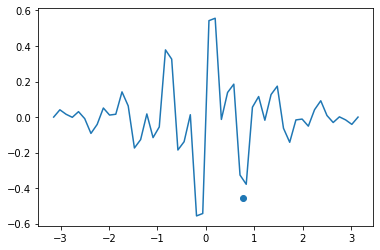

Não corresponde ao minimo


In [ ]:
#f(x) = np.cos(4*x)*sen(10*x)*numpy.exp(-np.abs(x))
def funcao3(x):
    return np.cos(4*x)*np.sin(10*x)*np.exp(-np.abs(x))
dom=np.linspace(-np.pi,np.pi)
ponto_minimo=sc.fminbound(funcao3,-np.pi,np.pi,full_output=True, disp=3)
print("Ponto minimo:"+str(ponto_minimo))

plt.plot(dom,funcao3(dom))
plt.scatter(0.7767962505527384, -0.4579054636878386)
plt.show()
print("Não corresponde ao minimo")

Questão 4.

Resolva o seguinte problema de maximização:

\begin{eqnarray}
\max_{x_{1},x_{2}} 2x_{1} - x_{2} \ \ s.a. \ \  x_{1} + 3x_{2} \geq 8 \ , \ x_{1} + x_{2} \geq 4 \ , \ x_{1} - x_{2} \leq 2 \ , \ x_{1}, x_{2} > 0
\end{eqnarray}

In [ ]:
def maxfuncao(parametros):
    x1,x2 = parametros
    return 2*x1-x2

def retricaoFuncao1(parametros):
    x1,x2 = parametros
    return x1+3*x2-8

def retricaoFuncao2(parametros):
    x1,x2 = parametros
    return x1+x2-4

def retricaoFuncao3(parametros):
    x1,x2 = parametros
    return -x1+x2+2

restricoes = [{'type':'ineq', 'fun': retricaoFuncao1},
        {'type':'ineq', 'fun': retricaoFuncao2},
        {'type':'ineq', 'fun': retricaoFuncao3}]

positivo = ((0, None), (0, None))
sc.minimize(maxfuncao, [0, 0], method='SLSQP', bounds=positivo,constraints=restricoes)
#multiplicar por -1 para maximizar

     fun: -2136230471.75928
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([1.63150145e-13, 2.13623047e+09])

Questão 5.

Parabéns! Você foi contratado para uma posição em uma empresa que paga
muito bem assim que terminou a faculdade. A sua companhia produz cadeiras (cada uma requer
2 blocos quadrados e 1 bloco retangular) e mesas (cada uma requer 2 blocos quadrados e 2 blocos
retangulares) e possui estoque de 8 blocos retangulares e 6 blocos quadrados. Assuma que
cada cadeira e mesa sejam vendidas pelos seguintes preços, respectivamente, $\$5$ e $\$7$ e que a sua
companhia vende tudo que produz. Resolva o problema de maximização de receita da sua empresa.

In [ ]:
#Não finalizada
def cadeiras(parametros):
    q,r=parametros
    return 2*q+1*r

def mesas(parametros):
    q,r=parametros
    return 2*q+2*r

def producao(parametros):
    q,r=parametros
    5*cadeiras([q,r])-7*mesas([q,r])


# Questão 6.

Você deve realizar a coleta de todos os Pokemóns listados no website abaixo. Em seguida deve extrair as informações de cada um deles e colocar em um Dataframe do Pandas. Utilize o comando *describe* para obter uma informação das estatísticas da tabela. Em seguioda, obtenha o/os pokemón(s) com a(s) maior(es) velocidade(s) e o/os pokemón(s) com a(s) menor(es) velocidade(s).

`url = "http://pokemondb.net/pokedex/all"`

In [ ]:
url = "http://pokemondb.net/pokedex/all"
requisicao= rq.get(url)
requisicao=requisicao.text
soup_data = BeautifulSoup(requisicao, 'lxml')
tp = soup_data.find_all("table",attrs={"id":"pokedex"})
pokemonsPesquisa = tp[0].find_all("tr")

pokemons=[]

for i in range(1,len(pokemonsPesquisa)):
    try:
        nome=pokemonsPesquisa[i].find_all("a",attrs={"class":"ent-name"})[0]
        total=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-total"})[0]
        hp=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-total"})[0]
        ataque=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-num"})[1]
        defesa=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-num"})[2]
        velocidade_ataque=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-num"})[3]
        velocidade_defesa=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-num"})[4]
        velocidade=pokemonsPesquisa[i].find_all("td",attrs={"class":"cell-num"})[5]
        pokemons.append({"Name":nome.text,
                         "Total":int(total.text),
                         "HP":int(hp.text),
                         "Attack":int(ataque.text),
                         "Defense":int(defesa.text),
                         "Sp.Attack":int(velocidade_ataque.text),
                         "Sp.Defense":int(velocidade_defesa.text),
                         "Speed":int(velocidade.text)})
    except:
        print("Erro")

pokemonsData=pd.DataFrame(pokemons)
print(pokemonsData.describe())

print("Pokemon(s) com maior velocidade: ")
print(pokemonsData[pokemonsData["Speed"]==pokemonsData["Speed"].max()])

print("Pokemon(s) com menor velocidade: ")
print(pokemonsData[pokemonsData["Speed"]==pokemonsData["Speed"].min()])

             Total           HP       Attack      Defense    Sp.Attack  \
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000   
mean    439.314833   439.314833    70.067943    80.466986    74.661244   
std     121.970701   121.970701    26.671411    32.413665    31.237903   
min     175.000000   175.000000     1.000000     5.000000     5.000000   
25%     330.000000   330.000000    50.000000    55.000000    50.000000   
50%     458.000000   458.000000    68.000000    77.000000    70.000000   
75%     515.000000   515.000000    82.000000   100.000000    90.000000   
max    1125.000000  1125.000000   255.000000   190.000000   250.000000   

        Sp.Defense        Speed  
count  1045.000000  1045.000000  
mean     73.022010    72.288995  
std      32.724797    28.074148  
min      10.000000    20.000000  
25%      50.000000    50.000000  
50%      65.000000    70.000000  
75%      95.000000    90.000000  
max     194.000000   250.000000  
Pokemon(s) com maior veloci